<a href="https://colab.research.google.com/github/krmayank01/Loan-Default-Prediction/blob/main/Loan_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loan Defaults In Peer-To-Peer Lending**


# **Overview**

---


In this project, we will analyze a dataset containing data on potential borrowers. The goal of this project is to build a model predicting the loan default of potential borrowers.




# **Importing Important Library and connecting drive**

---



In [ ]:
#Load the necessary python libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score,recall_score,accuracy_score,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, auc, r2_score, f1_score, roc_curve, PrecisionRecallDisplay , precision_recall_curve

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
try:
  Working_dir="/content/drive/MyDrive/Lending_Club_Data"
  loan_df=pd.read_csv(Working_dir+"/LoanStats3a.csv",skiprows=1,low_memory=False)
  print("The loan dataset has {} samples with {} features.".format(*loan_df.shape))
except:
    print("The loan dataset could not be loaded. Is the dataset missing?")

The loan dataset has 42538 samples with 111 features.


In [ ]:
loan_df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501  1296599.0     5000.0       5000.0           4975.0   36 months   
1  1077430  1314167.0     2500.0       2500.0           2500.0   60 months   
2  1077175  1313524.0     2400.0       2400.0           2400.0   36 months   
3  1076863  1277178.0    10000.0      10000.0          10000.0   36 months   
4  1075358  1311748.0     3000.0       3000.0           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [ ]:
loan_df.iloc[0]

id                              1077501
member_id                     1296599.0
loan_amnt                        5000.0
funded_amnt                      5000.0
funded_amnt_inv                  4975.0
                                ...    
tax_liens                           0.0
tot_hi_cred_lim                     NaN
total_bal_ex_mort                   NaN
total_bc_limit                      NaN
total_il_high_credit_limit          NaN
Name: 0, Length: 111, dtype: object

# **Column Information**

---
:id:-A unique LC assigned ID for the loan listing.

1:member_id:-A unique LC assigned Id for the borrower member.

2:loan_amnt:-The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

3:funded_amnt:-The total amount committed to that loan at that point in time.

4:funded_amnt_inv:-The total amount committed by investors for that loan at that point in time.

5:term:-The number of payments on the loan. Values are in months and can be either 36 or 60.

6:int_rate:-Interest Rate on the loan

7:installment:-The monthly payment owed by the borrower if the loan originates.

8:grade:-LC assigned loan grade

9:sub_grade:-LC assigned loan subgrade

10:emp_title:-The job title supplied by the Borrower when applying for the loan.*

11:emp_length:-Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

12:home_ownership:-The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

13:annual_inc:-The self-reported annual income provided by the borrower during registration.

14:verification_status:-Indicates if income was verified by LC, not verified, or if the income source was verified

15:issue_d:-The month which the loan was funded

16:loan_status:-Current status of the loan

17:pymnt_plan:-Indicates if a payment plan has been put in place for the loan

18:url:-URL for the LC page with listing data.

19:desc:-Loan description provided by the borrower

20:purpose:-A category provided by the borrower for the loan request.

21:title:-The loan title provided by the borrower

22:zip_code:-The first 3 numbers of the zip code provided by the borrower in the loan application. 23:addr_state:-The state provided by the borrower in the loan application 24:dti:-A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

25:delinq_2yrs:-The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

26:earliest_cr_line:-The month the borrower's earliest reported credit line was opened

27:fico_range_low:-The lower boundary range the borrower’s FICO at loan origination belongs to.

28:fico_range_high:-The upper boundary range the borrower’s FICO at loan origination belongs to.

29:inq_last_6mths:-The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

30:mths_since_last_delinq:-The number of months since the borrower's last delinquency.

31:open_acc:-The number of open credit lines in the borrower's credit file.

32:pub_rec:-Number of derogatory public records

33:revol_bal:-Total credit revolving balance

34:revol_util:-Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

35:total_acc:-The total number of credit lines currently in the borrower's credit file

36:initial_list_status:-The initial listing status of the loan. Possible values are – W, F

37:out_prncp:-Remaining outstanding principal for total amount funded

38:out_prncp_inv:-Remaining outstanding principal for portion of total amount funded by investors

39:total_pymnt:-Payments received to date for total amount funded

40:total_pymnt_inv:-Payments received to date for portion of total amount funded by investors

41:total_rec_prncp:-Principal received to date

42:total_rec_int:-Interest received to date

43:total_rec_late_fee:-Late fees received to date

44:recoveries:-post charge off gross recovery

45:collection_recovery_fee:-post charge off collection fee

46:last_pymnt_d:-Last month payment was received

47:last_pymnt_amnt:-Last total payment amount received

48:last_credit_pull_d:-The most recent month LC pulled credit for this loan

49:last_fico_range_high:-The upper boundary range the borrower’s last FICO pulled belongs to.

50:last_fico_range_low:-The lower boundary range the borrower’s last FICO pulled belongs to.

51:collections_12_mths_ex_med:-Number of collections in 12 months excluding medical collections

52:policy_code:-publicly available policy_code=1

new products not publicly available policy_code=2

53:application_type:-Indicates whether the loan is an individual application or a joint application with two co-borrowers

54:acc_now_delinq:-The number of accounts on which the borrower is now delinquent.

55:chargeoff_within_12_mths:-Number of charge-offs within 12 months

56:delinq_amnt:-The past-due amount owed for the accounts on which the borrower is now delinquent.

57:pub_rec_bankruptcies:-Number of public record bankruptcies

58:tax_liens:-Number of tax liens


# Looking for Some More information

In [ ]:
loan_df.describe()

member_id     loan_amnt   funded_amnt  funded_amnt_inv  \
count  4.253500e+04  42535.000000  42535.000000     42535.000000   
mean   8.257026e+05  11089.722581  10821.585753     10139.830603   
std    2.795409e+05   7410.938391   7146.914675      7131.686447   
min    7.047300e+04    500.000000    500.000000         0.000000   
25%    6.384795e+05   5200.000000   5000.000000      4950.000000   
50%    8.241780e+05   9700.000000   9600.000000      8500.000000   
75%    1.033946e+06  15000.000000  15000.000000     14000.000000   
max    1.314167e+06  35000.000000  35000.000000     35000.000000   

        installment    annual_inc           dti   delinq_2yrs  inq_last_6mths  \
count  42535.000000  4.253100e+04  42535.000000  42506.000000    42506.000000   
mean     322.623063  6.913656e+04     13.373043      0.152449        1.081424   
std      208.927216  6.409635e+04      6.726315      0.512406        1.527455   
min       15.670000  1.896000e+03      0.000000      0.000000        0.000000   
25%      165.520000  4.000000e+04      8.200000      0.000000        0.000000   
50%      277.690000  5.900000e+04     13.470000      0.000000        1.000000   
75%      428.180000  8.250000e+04     18.680000      0.000000        2.000000   
max     1305.190000  6.000000e+06     29.990000     13.000000       33.000000   

       mths_since_last_delinq  ...  num_tl_90g_dpd_24m  num_tl_op_past_12m  \
count            15609.000000  ...                 0.0                 0.0   
mean                35.017618  ...                 NaN                 NaN   
std                 22.418427  ...                 NaN                 NaN   
min                  0.000000  ...                 NaN                 NaN   
25%                 17.000000  ...                 NaN                 NaN   
50%                 33.000000  ...                 NaN                 NaN   
75%                 51.000000  ...                 NaN                 NaN   
max                120.000000  ...                 NaN                 NaN   

       pct_tl_nvr_dlq  percent_bc_gt_75  pub_rec_bankruptcies     tax_liens  \
count             0.0               0.0          41170.000000  42430.000000   
mean              NaN               NaN              0.045227      0.000024   
std               NaN               NaN              0.208737      0.004855   
min               NaN               NaN              0.000000      0.000000   
25%               NaN               NaN              0.000000      0.000000   
50%               NaN               NaN              0.000000      0.000000   
75%               NaN               NaN              0.000000      0.000000   
max               NaN               NaN              2.000000      1.000000   

       tot_hi_cred_lim  total_bal_ex_mort  total_bc_limit  \
count              0.0                0.0             0.0   
mean               NaN                NaN             NaN   
std                NaN                NaN             NaN   
min                NaN                NaN             NaN   
25%                NaN                NaN             NaN   
50%                NaN                NaN             NaN   
75%                NaN                NaN             NaN   
max                NaN                NaN             NaN   

       total_il_high_credit_limit  
count                         0.0  
mean                          NaN  
std                           NaN  
min                           NaN  
25%                           NaN  
50%                           NaN  
75%                           NaN  
max                           NaN  

[8 rows x 86 columns]

some column contain only single value through out dataset. We could drop them latter.

In [ ]:
loan_df["loan_status"].value_counts()

Fully Paid                                             34085
Charged Off                                             5662
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                   19
Late (31-120 days)                                         9
In Grace Period                                            8
Late (16-30 days)                                          2
Default                                                    1
Name: loan_status, dtype: int64

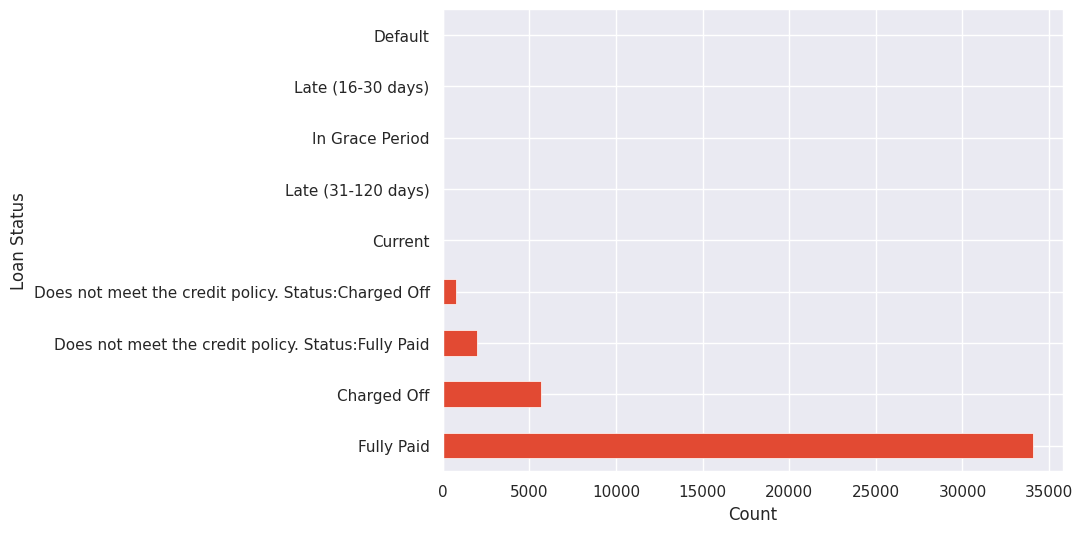

In [ ]:
# Plot Loan Status
plt.figure(figsize= (8,6))
plt.ylabel('Loan Status')
plt.xlabel('Count')
loan_df['loan_status'].value_counts().plot(kind = 'barh', grid = True)
plt.show()

**Here loan status has nine different possible values**! Let’s learn about these unique values to determine the ones that best describe the final outcome of a loan, and also the kind of classification problem we’ll be dealing with.

**Fully Paid**->Loan has been fully paid off.

**Charged off**->Loan for which there is no longer a reasonable expectation of further payments.

**Does not meet the credit policy. Status:Fully Paid**--> While the loan was paid off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.

**Does not meet the credit policy. Status:charged off**->While the loan was charged off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.

**Current**->Loan is up to date on current payments.,

**In Grace period**->The loan is past due but still in the grace period of 15 days.

**Late(30-120)**->Loan hasn't been paid in 31 to 120 days (late on the current payment).

**Late(16-30)**->Loan hasn't been paid in 16 to 30 days (late on the current payment).

**Default**->Loan is defaulted on and no payment has been made for more than 121 days.

In [ ]:
loan_df=loan_df[loan_df["loan_status"]!='Current']
loan_df.dropna(subset=['loan_status'],inplace=True)
loan_df=loan_df.reset_index()
del loan_df['index']

Current status coustemer are treated separately because we don't how they behave so we need to predict thenm by our model.

In [ ]:
# Encoding the loan status variable
dct = {"loan_status":{ "Fully Paid": 0, "Charged Off": 1,'Does not meet the credit policy. Status:Fully Paid':1,
'Does not meet the credit policy. Status:Charged Off':1,'In Grace Period':1,'Late (31-120 days)':1 ,'Late (16-30 days)':1,'Default':1}}
loan_df = loan_df.replace(dct)

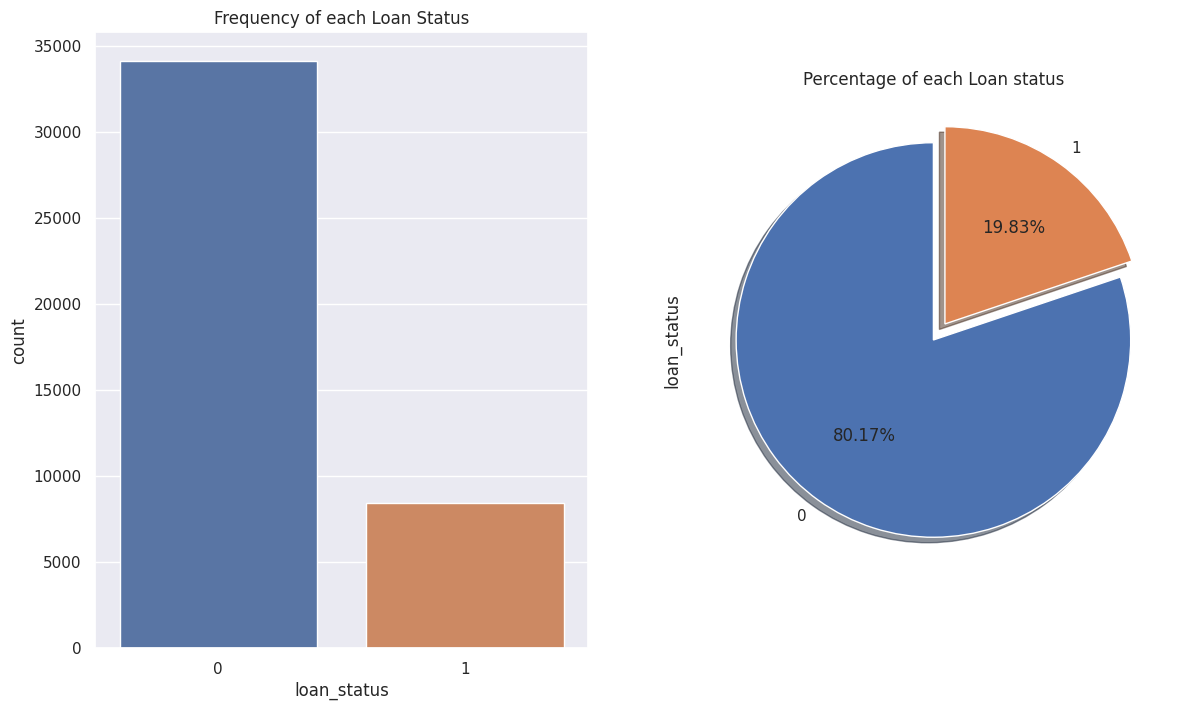

In [ ]:
sns.set_theme()
fig, axs = plt.subplots(1,2,figsize=(14,8))
sns.countplot(x='loan_status',data=loan_df,ax=axs[0])
axs[0].set_title("Frequency of each Loan Status")
loan_df.loan_status.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],shadow =True,explode = (0, 0.1,),autopct='%1.2f%%',startangle=90 )
axs[1].set_title("Percentage of each Loan status")
plt.show()

This clearly is a case of an imbalanced class problem where the value of class is far less than the other. There are cost function based approaches and sampling based approaches for handling this kind of problem which we will use later so that our model doesn't exhibit high bias while trying to predict if a loan will default or not.

A common thing to predict in datasets like these are if a new loan will get default or not. I'll be keeping loans with default status as my target variable.

**Here, We have finalize loan status as our target variable which has now 19.8% are defaulters for the loan payment**.

# **Exploratory Data Analysis(EDA)**

---



---



**checking % of missing Value for all feature for our Loan df**

In [ ]:
def missing_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [ ]:
# Missing values statistics
miss_values = missing_values(loan_df)
miss_values.head()

Dataframe has 111 columns.
There are 77 columns that have missing values.


Missing Values  % of Total Values
total_cu_tl                              42516              100.0
total_rev_hi_lim                         42516              100.0
num_accts_ever_120_pd                    42516              100.0
mths_since_recent_revol_delinq           42516              100.0
mths_since_recent_inq                    42516              100.0

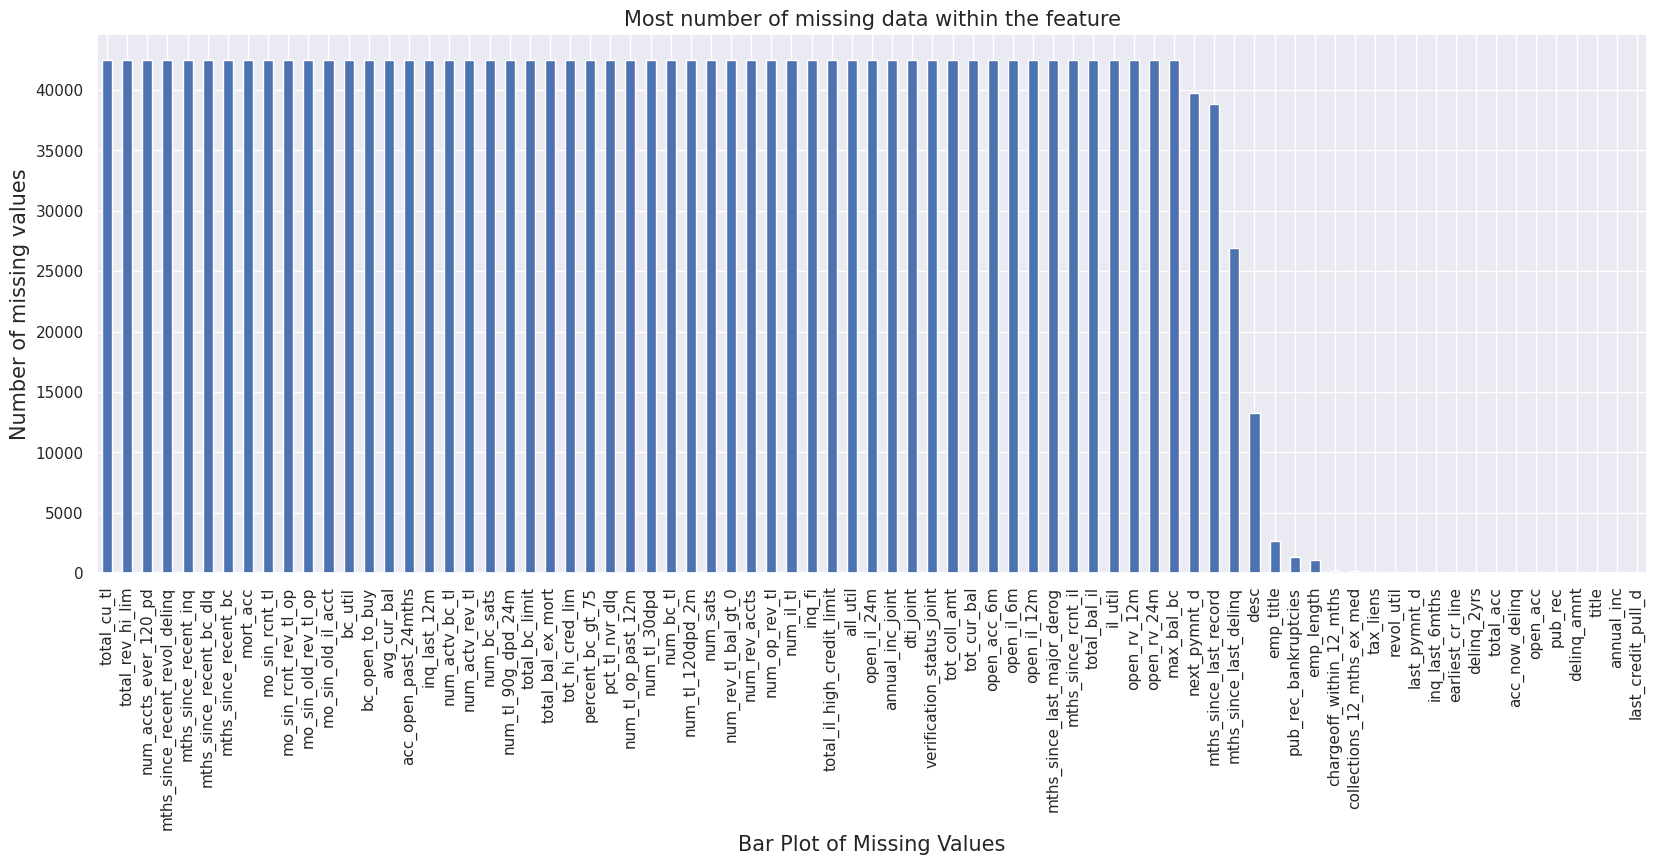

In [ ]:
plt.figure(figsize=(20,7))
missing= loan_df.isnull().sum()
missing= missing[missing > 0]
missing.sort_values(ascending= False, inplace=True)
plt.xlabel("Bar Plot of Missing Values", fontsize=15)
plt.ylabel("Number of missing values", fontsize=15)
plt.title("Most number of missing data within the feature", fontsize=15)
missing[:80].plot(kind="bar")

plt.show()

The percentage of missing data in many columns are far more than we can work with. So, we'll have to remove columns having a certain percentage of data less than the total data later on

**Droping Column which has missing value more than 90%**

In [ ]:
columns = [column for column in loan_df.count() < 42022*0.10]
loan_df.drop(loan_df.columns[columns], axis=1, inplace=True)

In [ ]:
# Missing values statistics
miss_values = missing_values(loan_df)
miss_values.head()
#Now our dataframe has only 21 features which has missing value

Dataframe has 55 columns.
There are 21 columns that have missing values.


Missing Values  % of Total Values
mths_since_last_delinq           26917               63.3
desc                             13290               31.3
emp_title                         2624                6.2
pub_rec_bankruptcies              1365                3.2
emp_length                        1110                2.6

# Remove features with only One Unique Value.

---
Let’s see is there any features that contain only one unique value? If yes, We can remove them because that feature is redundant for all the record.


In [ ]:
redundant_columns=list(loan_df.loc[:,loan_df.apply(pd.Series.nunique) == 1].columns)
len(redundant_columns)

6

In [ ]:
loan_df = loan_df.loc[:,loan_df.apply(pd.Series.nunique) != 1]

In [ ]:
# Missing values statistics
miss_values = missing_values(loan_df)

Dataframe has 49 columns.
There are 19 columns that have missing values.


## **Numerical Features Analysis**

In [ ]:
numeric_ls=list(loan_df.describe().columns.to_list())
loan_df[numeric_ls].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42516 entries, 0 to 42515
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   member_id                42516 non-null  float64
 1   loan_amnt                42516 non-null  float64
 2   funded_amnt              42516 non-null  float64
 3   funded_amnt_inv          42516 non-null  float64
 4   installment              42516 non-null  float64
 5   annual_inc               42512 non-null  float64
 6   loan_status              42516 non-null  int64  
 7   dti                      42516 non-null  float64
 8   delinq_2yrs              42487 non-null  float64
 9   inq_last_6mths           42487 non-null  float64
 10  mths_since_last_delinq   15599 non-null  float64
 11  open_acc                 42487 non-null  float64
 12  pub_rec                  42487 non-null  float64
 13  revol_bal                42516 non-null  float64
 14  total_acc             

In [ ]:
loan_df[numeric_ls].head(2)

member_id  loan_amnt  funded_amnt  funded_amnt_inv  installment  \
0  1296599.0     5000.0       5000.0           4975.0       162.87   
1  1314167.0     2500.0       2500.0           2500.0        59.83   

   annual_inc  loan_status    dti  delinq_2yrs  inq_last_6mths  ...  \
0     24000.0            0  27.65          0.0             1.0  ...   
1     30000.0            1   1.00          0.0             5.0  ...   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0          5000.00         863.16                 0.0         0.0   
1           456.46         435.17                 0.0       122.9   

   collection_recovery_fee  last_pymnt_amnt  acc_now_delinq  delinq_amnt  \
0                     0.00           171.62             0.0          0.0   
1                     1.11           119.66             0.0          0.0   

   pub_rec_bankruptcies  tax_liens  
0                   0.0        0.0  
1                   0.0        0.0  

[2 rows x 29 columns]

In [ ]:
# Missing values statistics
miss_values = missing_values(loan_df[numeric_ls])

Dataframe has 29 columns.
There are 11 columns that have missing values.


We can drop below column as this is not having any information because it's primary key of columns and it's unique for all the record


*   member_id:-A unique LC assigned Id for the borrower member.

We can drop below features because it's not provided by customer and they can be future leak.


*   funded_amnt:-The total amount committed to that loan at that point in time.
*   funded_amnt_inv:-The total amount committed by investors for that loan at that point in time.






In [ ]:
redundant_columns=['member_id','funded_amnt','funded_amnt_inv']
redundant_columns

['member_id', 'funded_amnt', 'funded_amnt_inv']

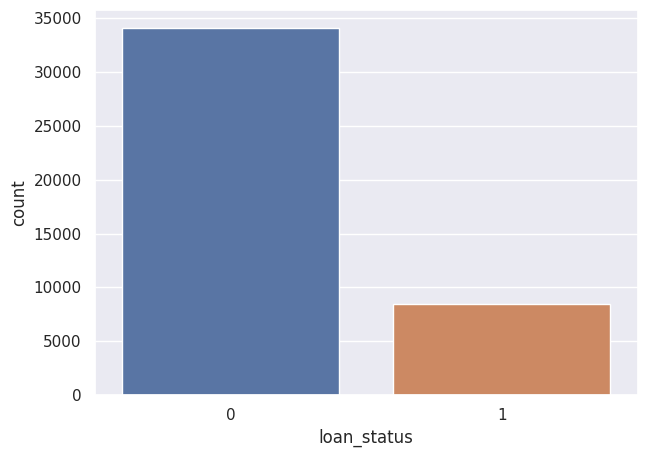

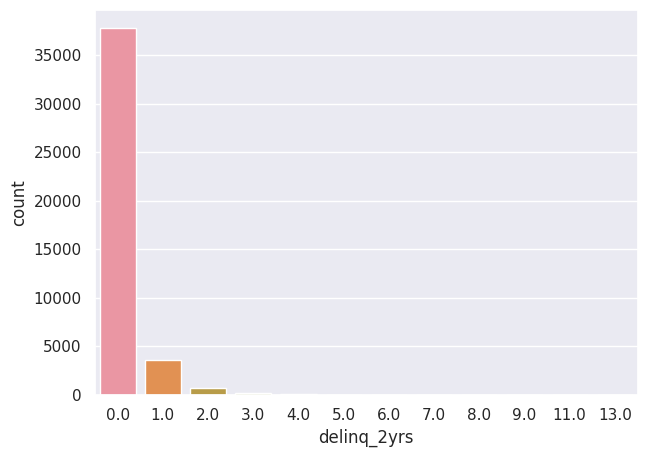

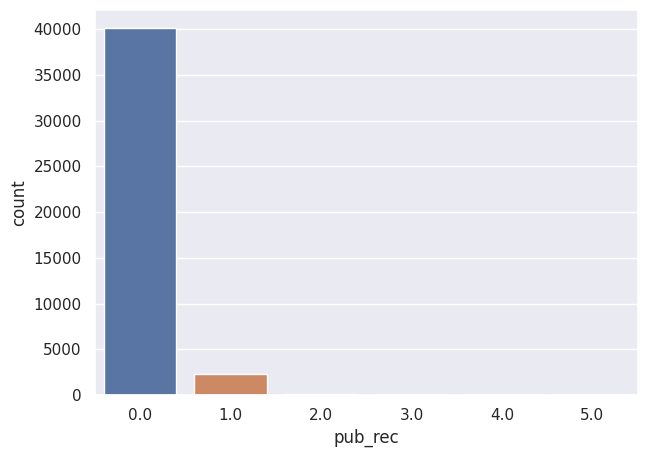

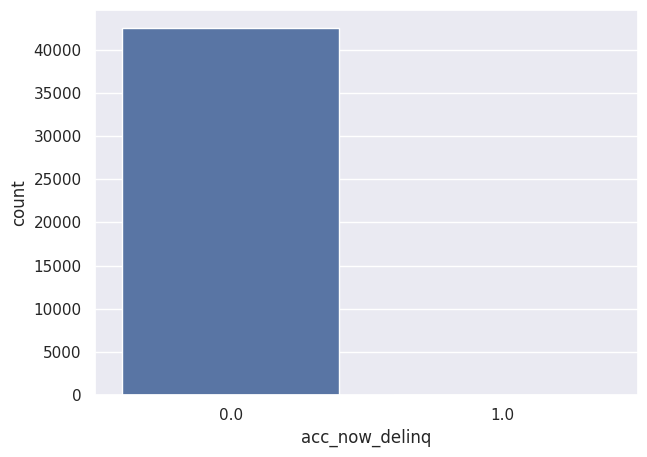

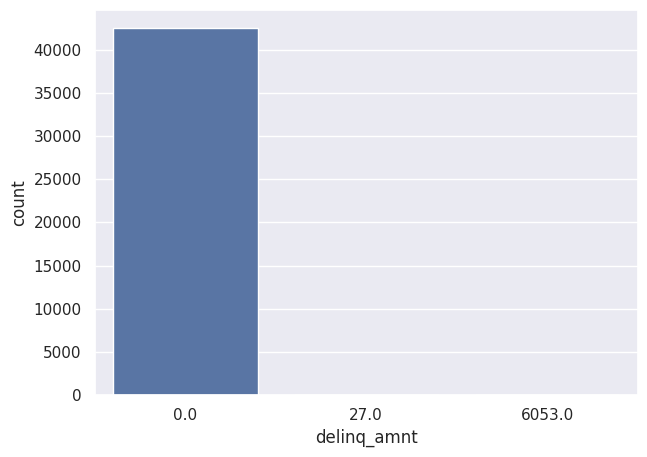

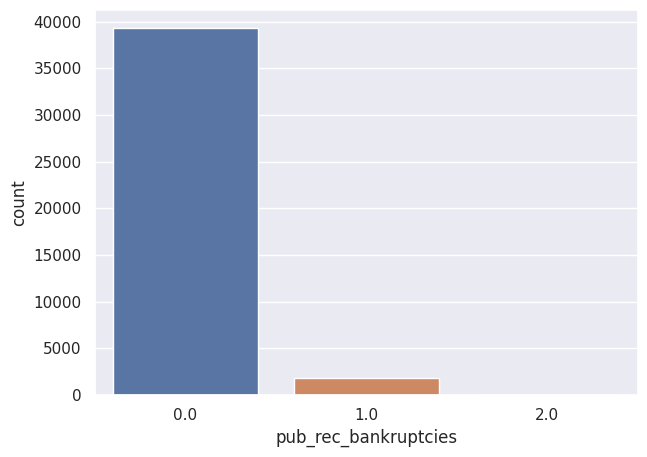

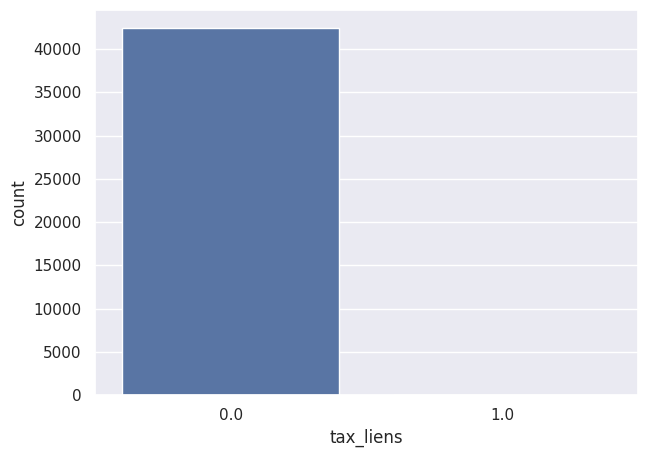

In [ ]:
for column in numeric_ls:
  if loan_df[column].nunique() < 14:
    plt.figure(figsize=(7,5)) 
    sns.countplot(x=column,data=loan_df[numeric_ls])
    #plt.legend()
    plt.show()

we can see some some column contain single observation so we need to drop them.

As we can see from unique counts feature tax_liens,acc_now_delinq,delinq_amnt, have only 1 unique value counts so we can drop these columns

In [ ]:
redundant_columns.append('tax_liens')
redundant_columns.append('acc_now_delinq')
redundant_columns.append('delinq_amnt')
redundant_columns

['member_id',
 'funded_amnt',
 'funded_amnt_inv',
 'tax_liens',
 'acc_now_delinq',
 'delinq_amnt']

**Below columns are the leaks data from the future.so we should drop it from our dataset.**


*   total_pymnt:-Payments received to date for total amount funded.
*   total_pymnt_inv:-Payments received to date for portion of total amount funded by investors.
*   total_rec_prncp:-Principal received to date.
*   total_rec_int:-Interest received to date.
*   total_rec_late_fee:-Late fees received to date.
*   recoveries:-post charge off gross recovery.
*   collection_recovery_fee:-post charge off collection fee.
*   last_pymnt_d:-Last month payment was received.
*   last_pymnt_amnt:-Last total payment amount received.



In [ ]:
redundant_columns.extend(['total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries',
                         'collection_recovery_fee','out_prncp','out_prncp_inv','last_pymnt_amnt'])
print(redundant_columns)

['member_id', 'funded_amnt', 'funded_amnt_inv', 'tax_liens', 'acc_now_delinq', 'delinq_amnt', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'out_prncp', 'out_prncp_inv', 'last_pymnt_amnt']


In [ ]:
numeric_ls=list(set(numeric_ls)-set(redundant_columns))
print(numeric_ls)

['delinq_2yrs', 'loan_status', 'open_acc', 'mths_since_last_delinq', 'pub_rec_bankruptcies', 'total_acc', 'inq_last_6mths', 'revol_bal', 'loan_amnt', 'pub_rec', 'annual_inc', 'dti', 'installment']


**Let's see the trend of all the feature wrt target variable**

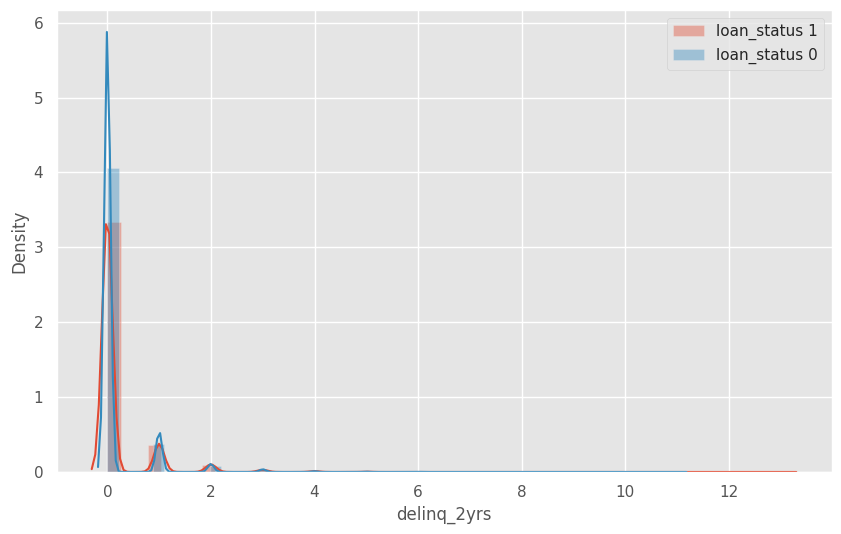

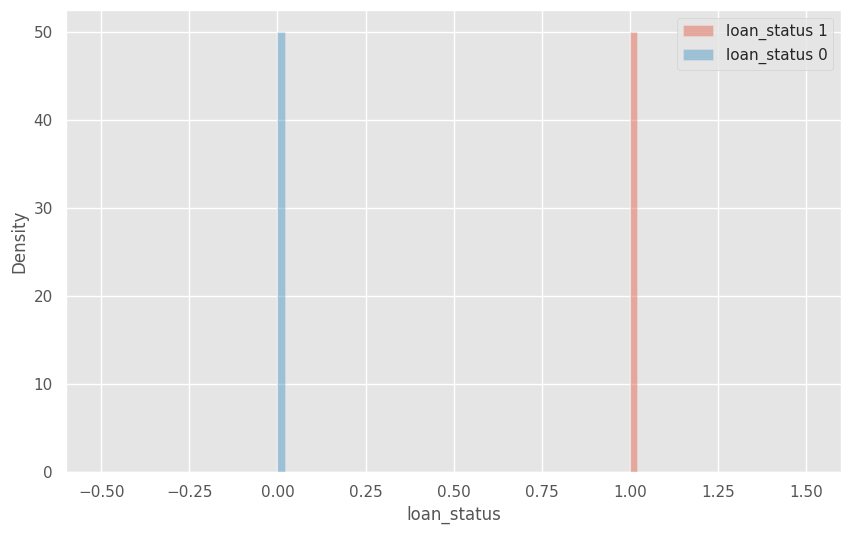

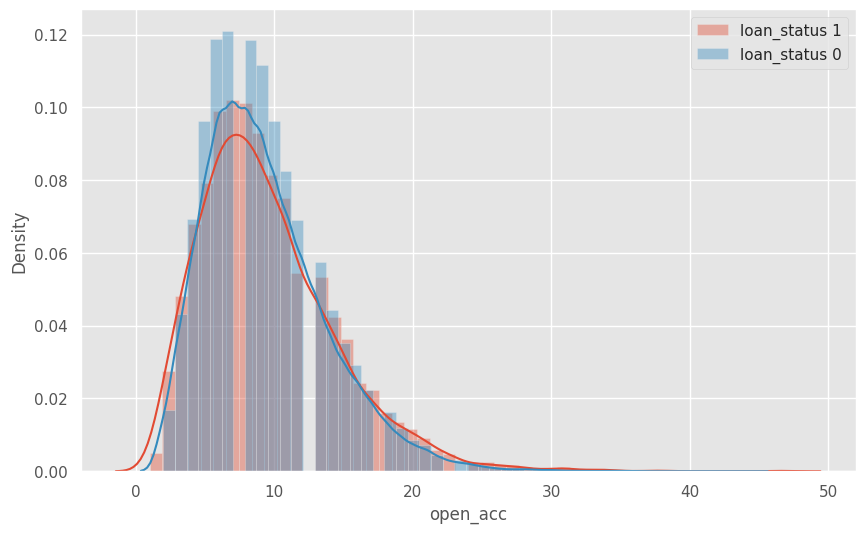

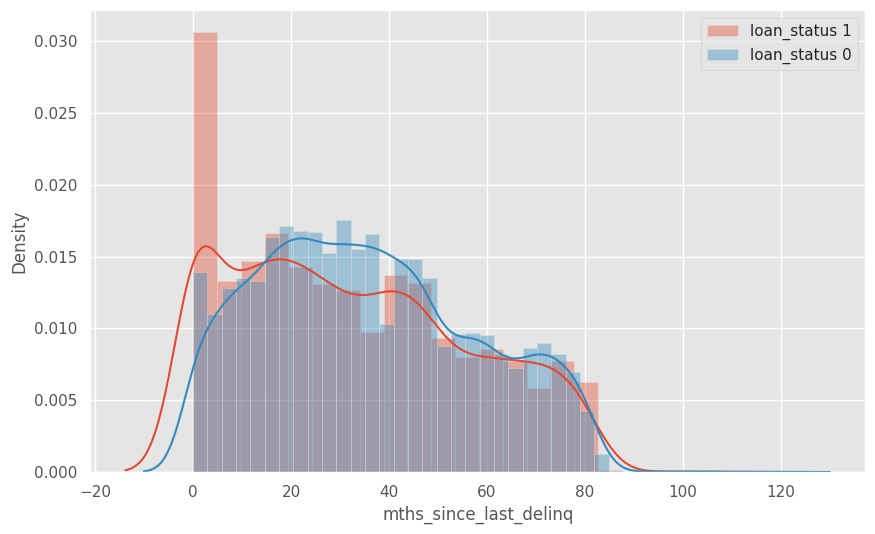

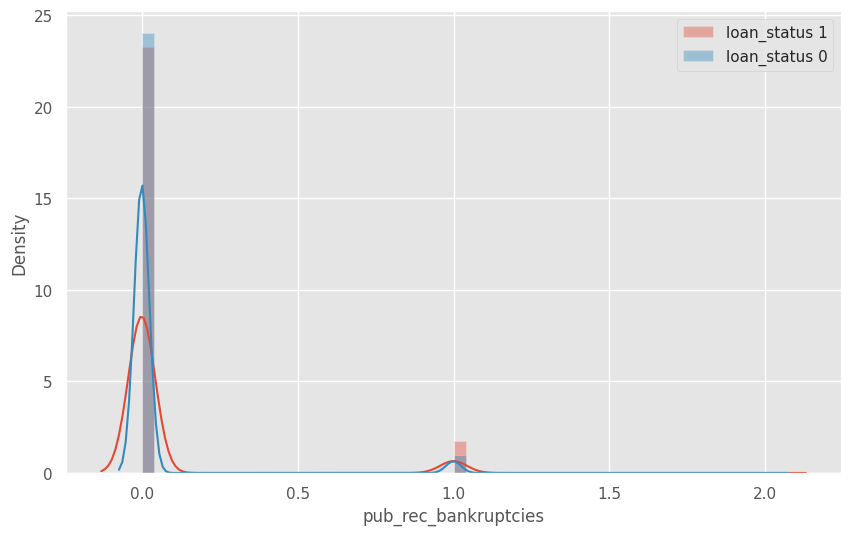

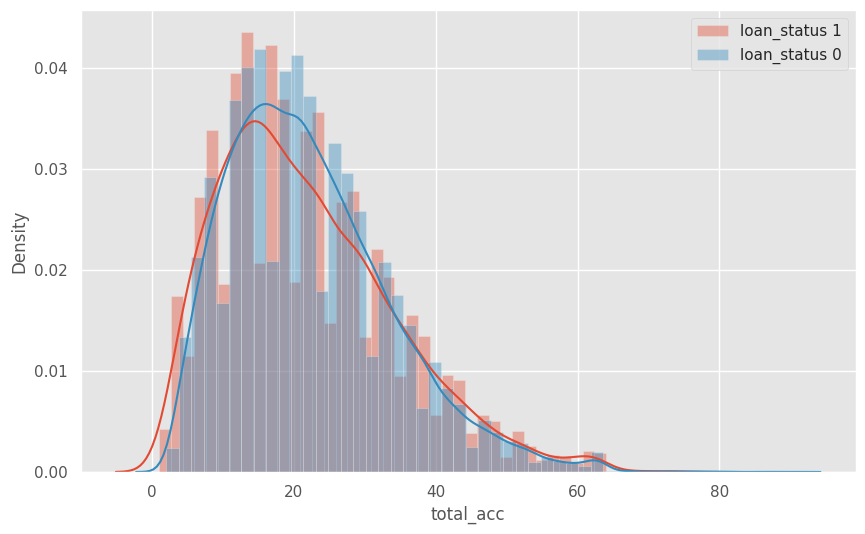

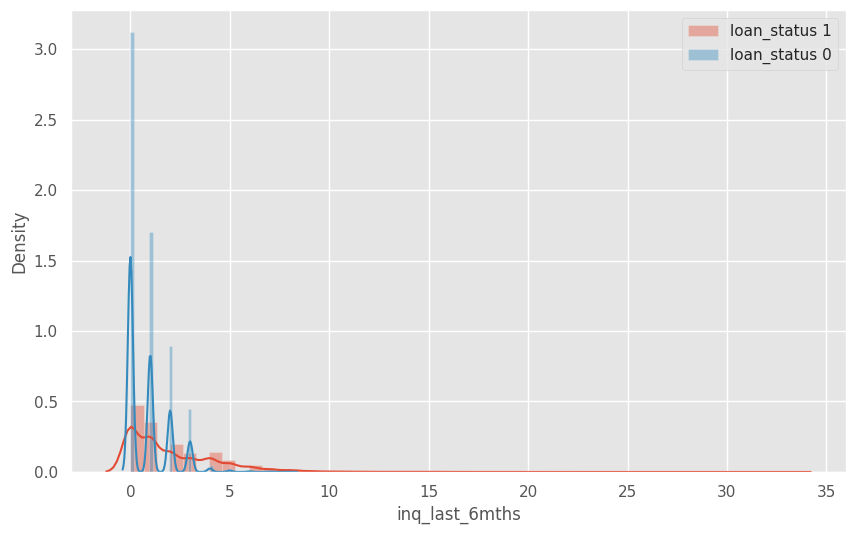

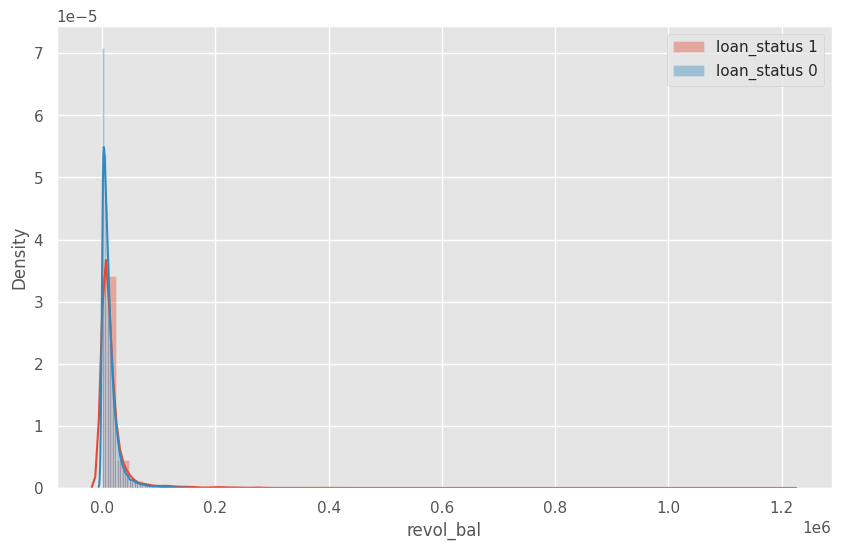

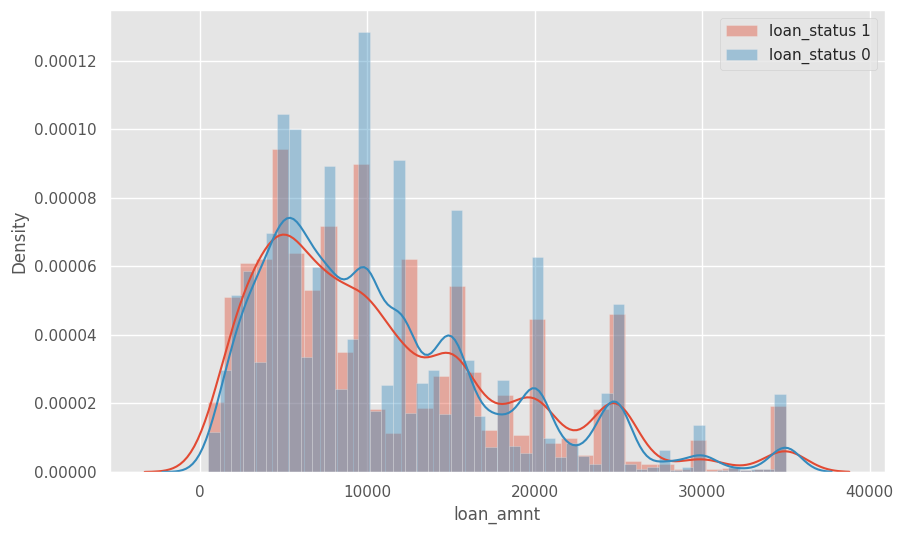

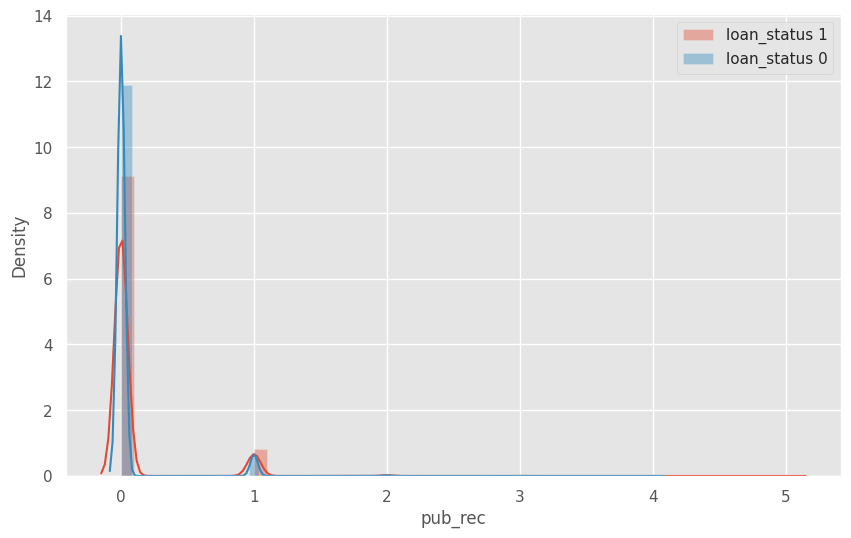

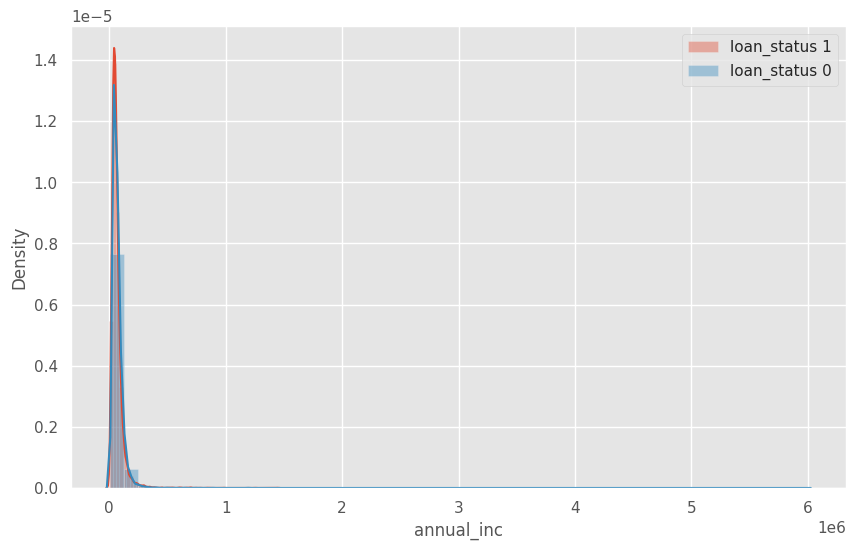

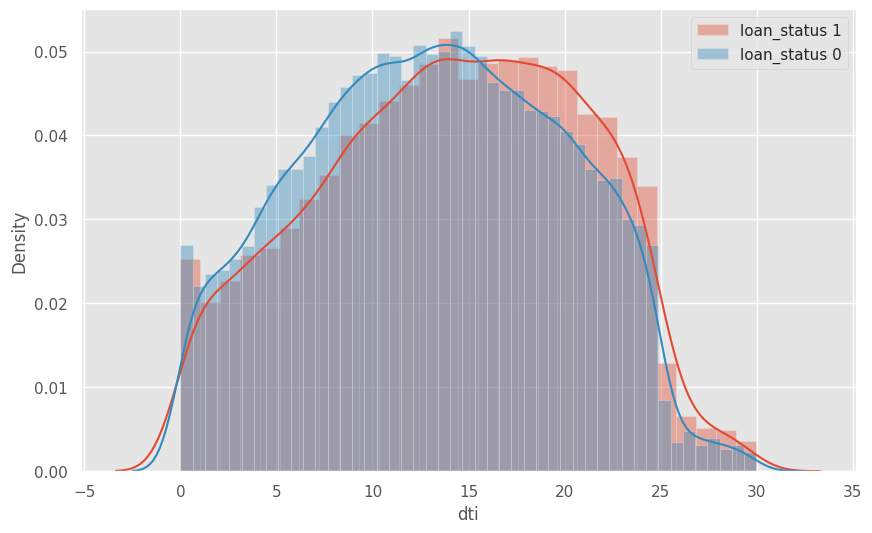

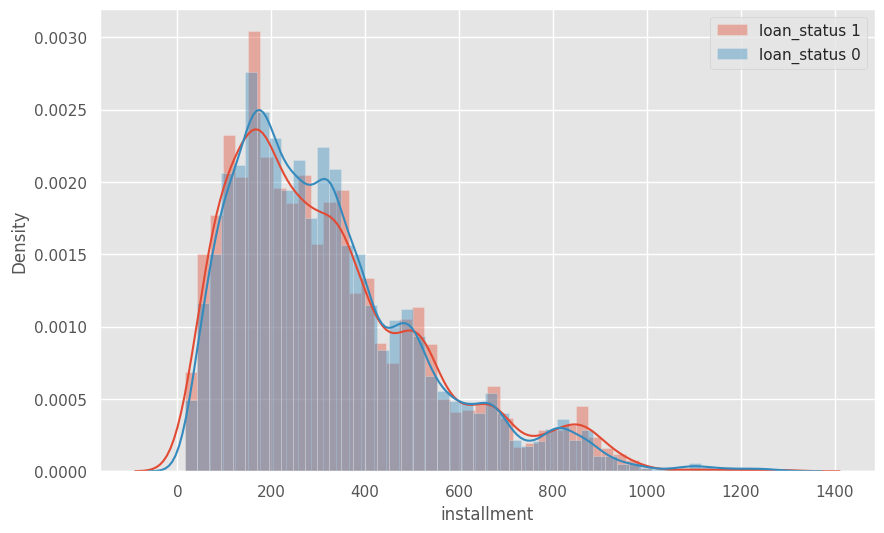

In [ ]:
plt.style.use('ggplot')
for col in loan_df[numeric_ls].columns:
  fig = plt.figure(figsize=(10,6))
  plt.style.use('ggplot')
  sns.distplot(loan_df[numeric_ls].loc[loan_df['loan_status'] == 1, col],label='loan_status 1')
  sns.distplot(loan_df[numeric_ls].loc[loan_df['loan_status'] == 0, col],label='loan_status 0')
  plt.legend()
  plt.show()

The density of interest rates follow kind of a Normal distribution with more density on interest rates between 12%-18%.

So we can see that annaul_inc is a skewd distribution so wee ned impliment outliar treatment on this.

we can see that intrate, installment and funded amount follow similar type distribution.

In [ ]:
loan_df[numeric_ls].head(3)

delinq_2yrs  loan_status  open_acc  mths_since_last_delinq  \
0          0.0            0       3.0                     NaN   
1          0.0            1       3.0                     NaN   
2          0.0            0       2.0                     NaN   

   pub_rec_bankruptcies  total_acc  inq_last_6mths  revol_bal  loan_amnt  \
0                   0.0        9.0             1.0    13648.0     5000.0   
1                   0.0        4.0             5.0     1687.0     2500.0   
2                   0.0       10.0             2.0     2956.0     2400.0   

   pub_rec  annual_inc    dti  installment  
0      0.0     24000.0  27.65       162.87  
1      0.0     30000.0   1.00        59.83  
2      0.0     12252.0   8.72        84.33

<Axes: >

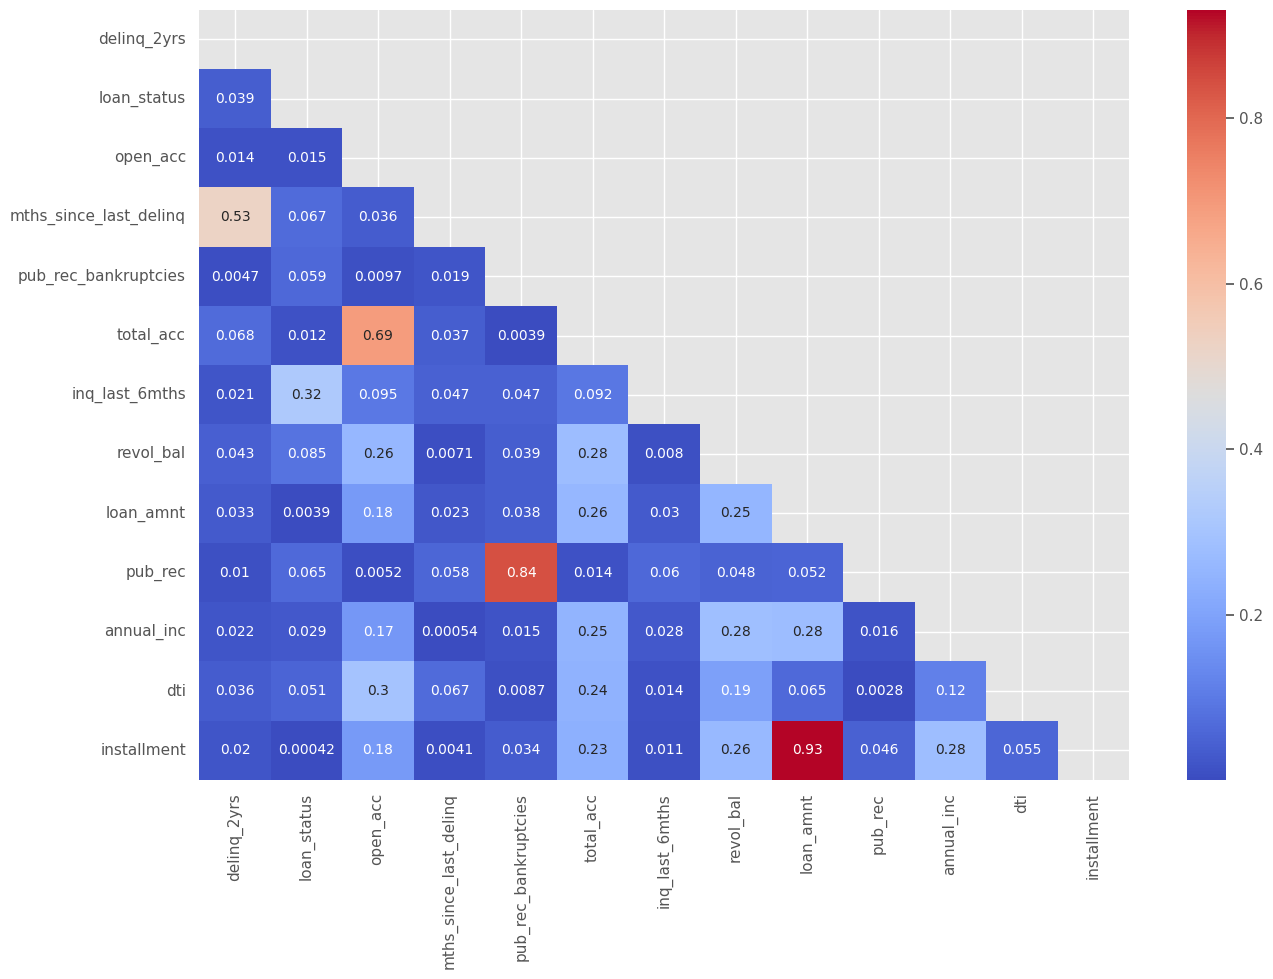

In [ ]:
plt.figure(figsize=(15,10))
cor=loan_df[numeric_ls].corr().abs()
mask = np.triu(np.ones_like(cor, dtype=bool))
sns.heatmap(cor,mask=mask,annot=True,cmap='coolwarm')

**Categorical Data Analysis**

In [ ]:
categorical_ls=list(set(loan_df.columns.to_list())-set(loan_df.describe().columns.to_list()))
loan_df[categorical_ls].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42516 entries, 0 to 42515
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   url                  42516 non-null  object
 1   term                 42516 non-null  object
 2   emp_length           41406 non-null  object
 3   revol_util           42426 non-null  object
 4   purpose              42516 non-null  object
 5   title                42503 non-null  object
 6   verification_status  42516 non-null  object
 7   id                   42516 non-null  object
 8   grade                42516 non-null  object
 9   sub_grade            42516 non-null  object
 10  home_ownership       42516 non-null  object
 11  zip_code             42516 non-null  object
 12  desc                 29226 non-null  object
 13  earliest_cr_line     42487 non-null  object
 14  int_rate             42516 non-null  object
 15  emp_title            39892 non-null  object
 16  addr

In [ ]:
miss_values = missing_values(loan_df[categorical_ls])

Dataframe has 20 columns.
There are 8 columns that have missing values.


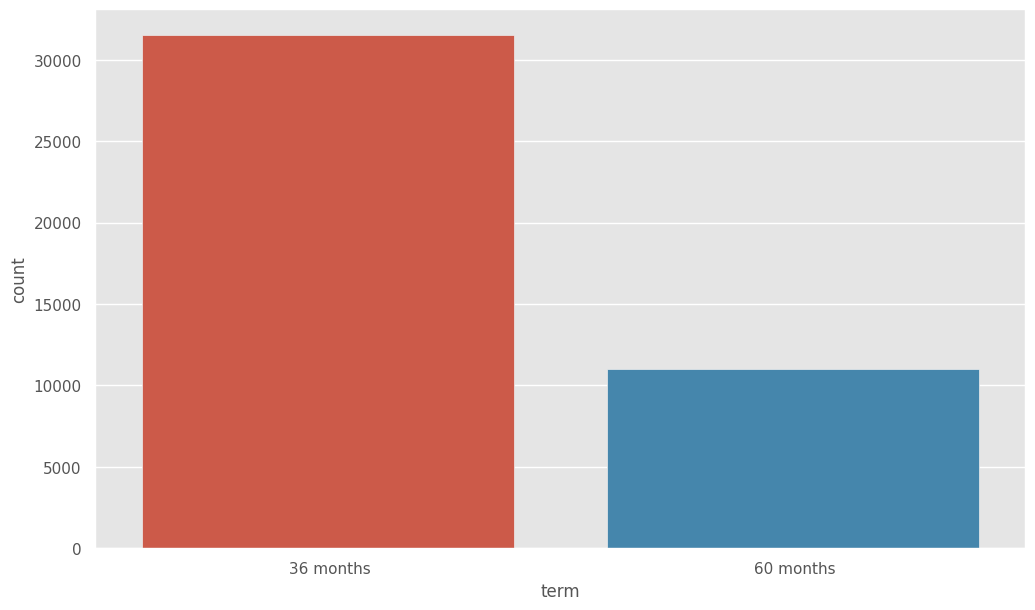

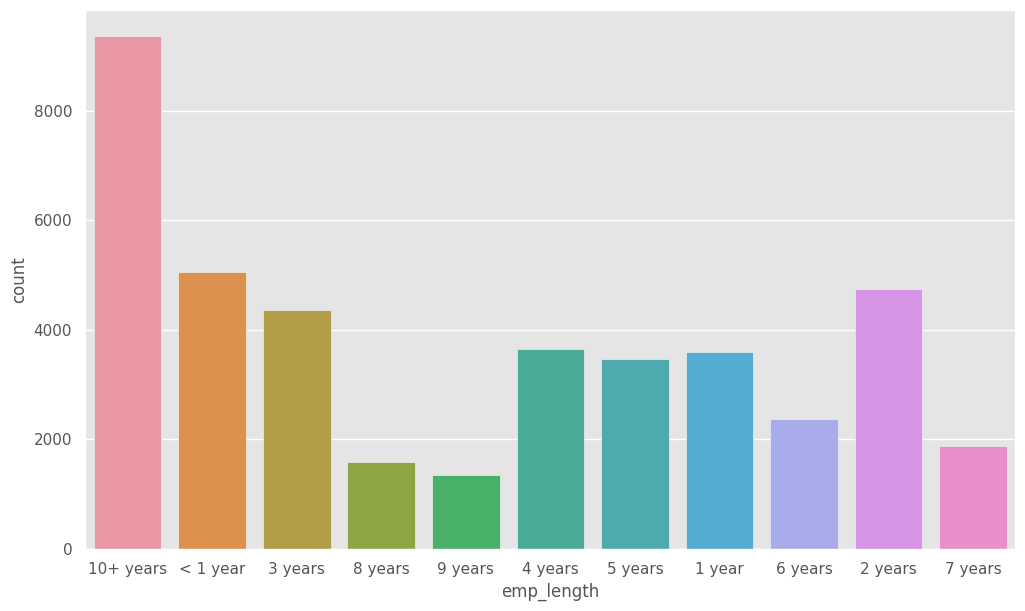

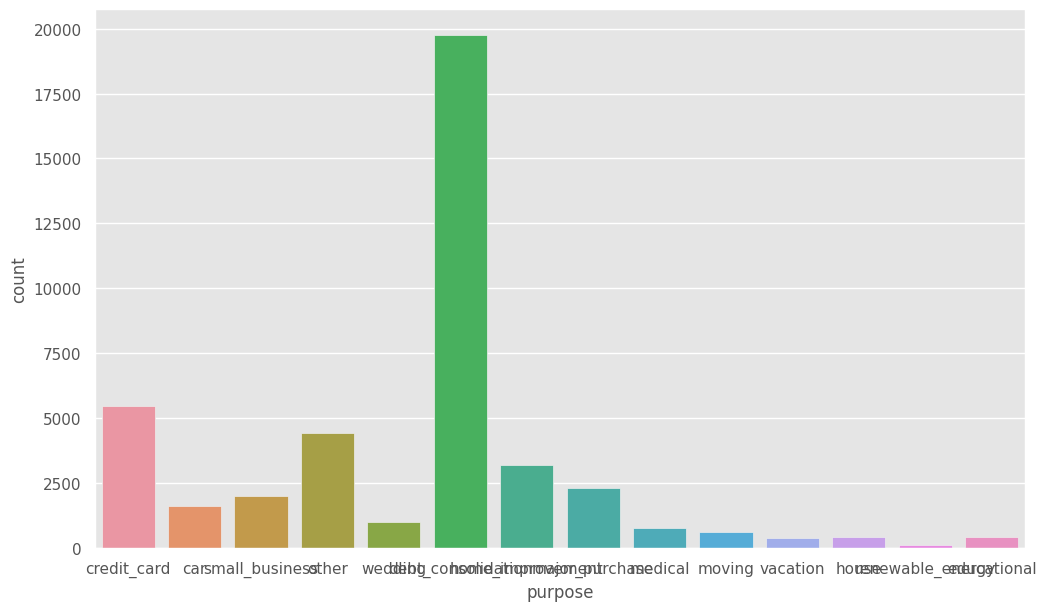

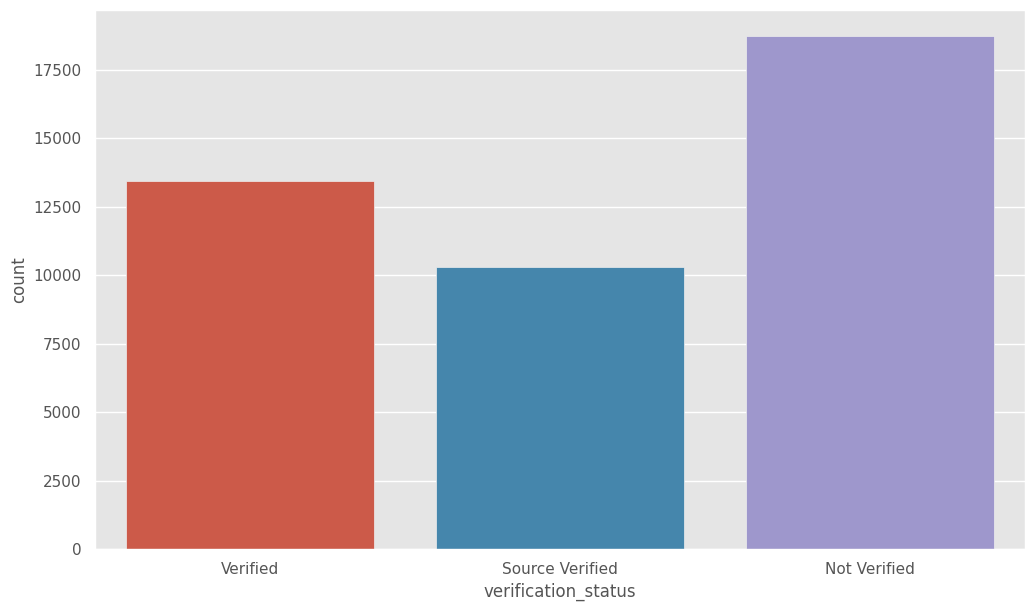

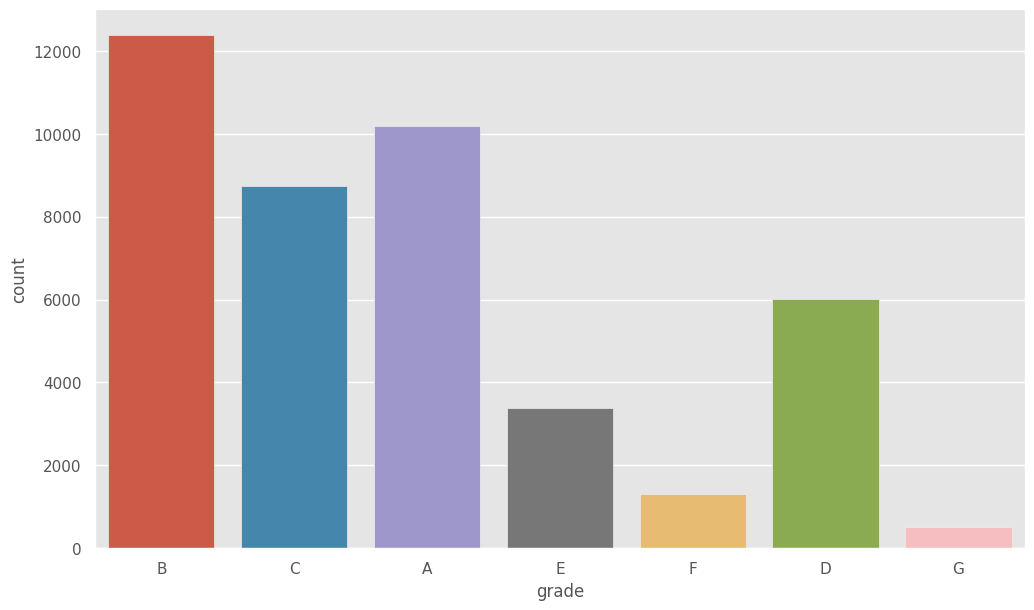

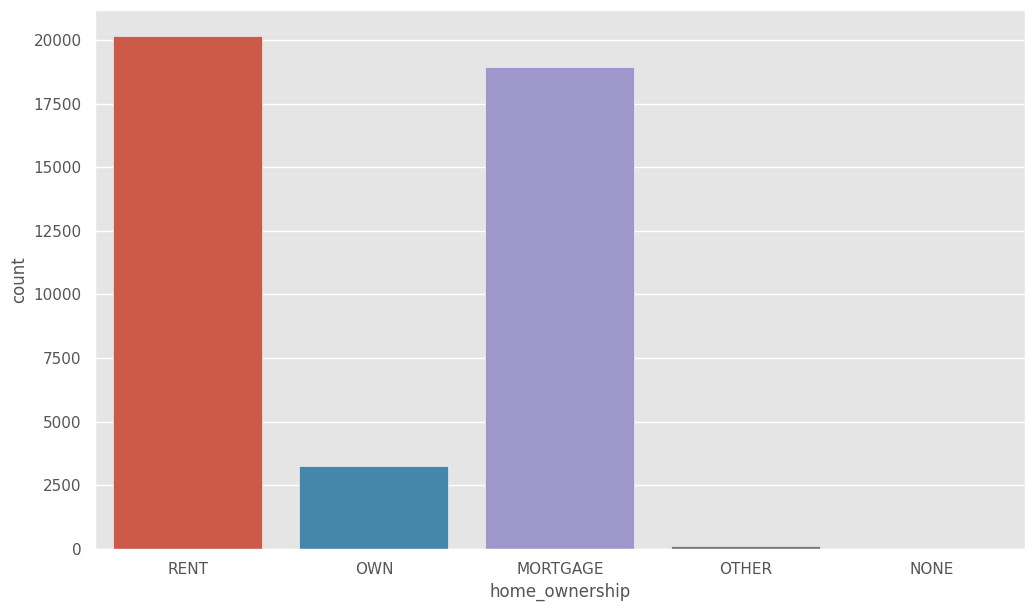

In [ ]:
plt.style.use('ggplot')
for column in categorical_ls:
  if loan_df[column].nunique() < 25:
    plt.figure(figsize=(12,7)) 
    sns.countplot(x=column,data=loan_df[categorical_ls])
    #plt.legend()
    plt.show()

In [ ]:
# leak data from future.

redundant_columns.extend(['last_pymnt_d','issue_d'])

Single Or Non Unique Value Contaning Data Points are Not usefull for prediction

In [ ]:
# All values are diffrent for these columns there is no pattern or any thing intutive
redundant_columns.extend(['url','title','emp_title','desc','id'])

Changing Object Type feature to Integer type features

In [ ]:
categorical_ls=list(set(categorical_ls)-set(redundant_columns))

In [ ]:
loan_df['term'] = loan_df['term'].replace("months","", regex=True).astype(int)
loan_df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
loan_df['emp_length']=loan_df['emp_length'].astype(float)

In [ ]:
loan_df['int_rate'] = loan_df['int_rate'].replace("%","", regex=True).astype(float)

In [ ]:
label_encod=['purpose','zip_code']

In [ ]:
#As it's an object type we can take only year and month feature from it
loan_df['earliest_cr_line_month'] = pd.to_datetime(loan_df['earliest_cr_line'].fillna('2001-08-01')).apply(lambda x: int(x.strftime('%m')))
loan_df['earliest_cr_line_year'] = pd.to_datetime(loan_df['earliest_cr_line'].fillna('2001-08-01')).apply(lambda x: int(x.strftime('%Y')))
redundant_columns.append('earliest_cr_line')

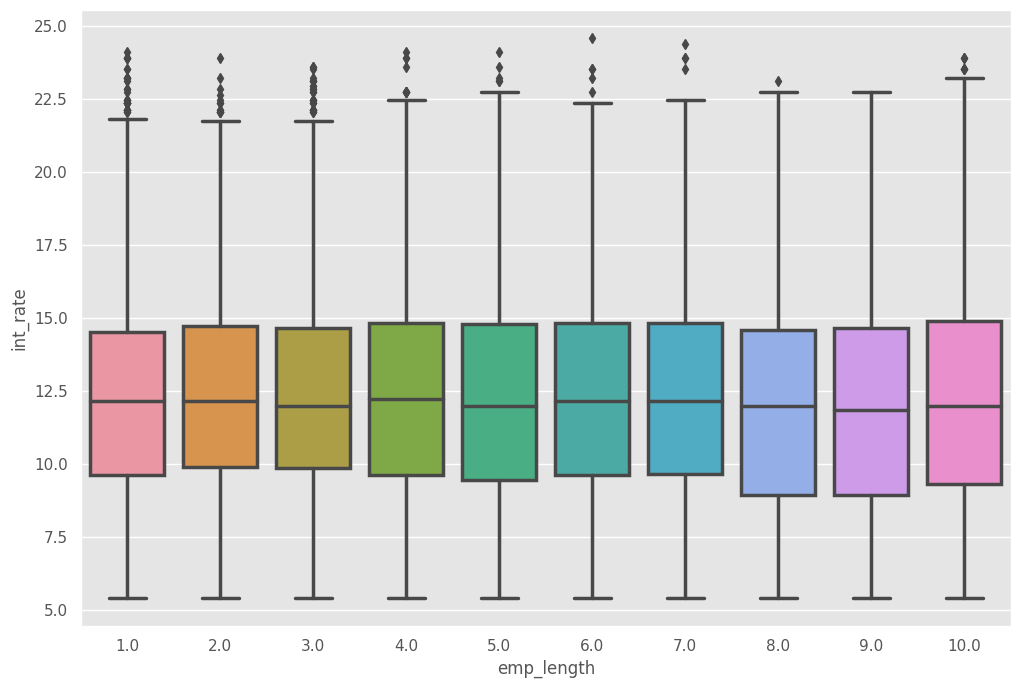

In [ ]:
plt.figure(figsize = (12,8))
ax = sns.boxplot(x="emp_length" ,y= "int_rate", data=loan_df, linewidth=2.5)

plt.show()


We can see that emp_length is similar for every intrest or vise versa

<Axes: xlabel='earliest_cr_line_month', ylabel='count'>

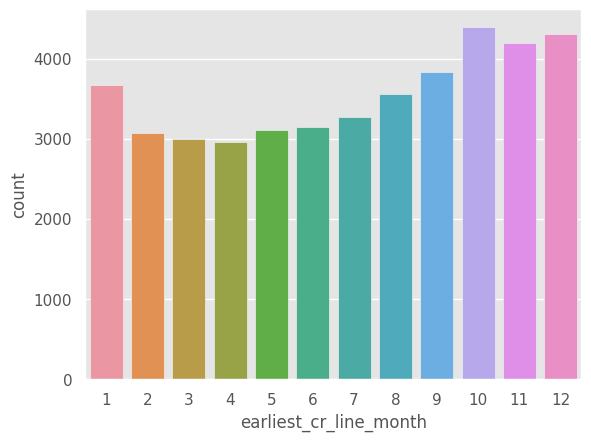

In [ ]:
sns.countplot(x='earliest_cr_line_month',data=loan_df)

In [ ]:
#As it's an object type we can take only year and month feature from it
loan_df['last_credit_pull_d_month'] = pd.to_datetime(loan_df['last_credit_pull_d'].fillna('2016-09-01')).apply(lambda x: int(x.strftime('%m')))
loan_df['last_credit_pull_d_year'] = pd.to_datetime(loan_df['last_credit_pull_d'].fillna('2016-09-01')).apply(lambda x: int(x.strftime('%Y')))
redundant_columns.append('last_credit_pull_d')


<Axes: xlabel='last_credit_pull_d_month', ylabel='count'>

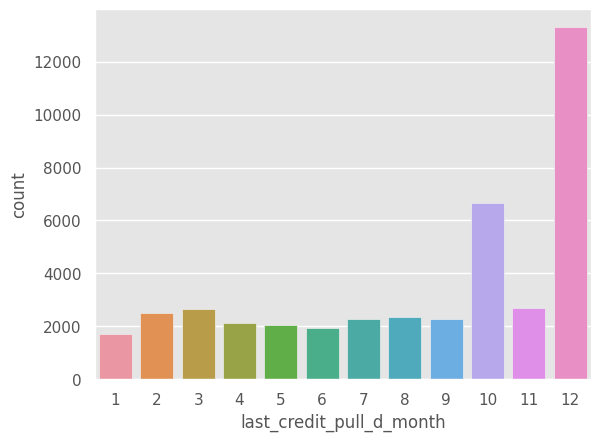

In [ ]:
sns.countplot(x='last_credit_pull_d_month',data=loan_df)


In [ ]:
one_hot_coding=['home_ownership']
redundant_columns.append('verification_status')

In [ ]:
label_encod.append('grade')
label_encod.append('sub_grade')

label_encod.append('addr_state')

**Revolving balance**

In credit card terms, a revolving balance is the portion of credit card spending that goes unpaid at the end of a billing cycle. The amount can vary, going up or down depending on the amount borrowed and the amount repaid.

In [ ]:
loan_df['revol_util'] = loan_df['revol_util'].str.replace('%', '')
loan_df['revol_util'] = loan_df['revol_util'].astype(float)

**We have done analysis for Categorical variable too.let's remove the column which we have stored in redundant columns.**

In [ ]:
#Droping all the column which we have stored in lst
loan_df.drop(redundant_columns, axis=1, inplace=True)

Label Encoding

In [ ]:
label_encod

['purpose', 'zip_code', 'grade', 'sub_grade', 'addr_state']

In [ ]:
from sklearn.preprocessing import LabelEncoder
# label_encoder object knows how to understand word labels. 
label_encoder = LabelEncoder()
# Encode labels in column 'grade'. 

loan_df[label_encod] =loan_df[label_encod].apply(LabelEncoder().fit_transform)

In [ ]:
loan_df[label_encod].head(5)

purpose  zip_code  grade  sub_grade  addr_state
0        1       726      1          6           3
1        0       280      2         13          10
2       11       512      2         14          14
3        9       763      2         10           4
4       13       720      0          3           3

**One hot coding**

In [ ]:
#Encoding the purpose features
#nominal_columns = ["purpose"]
dummy_df = pd.get_dummies(loan_df[one_hot_coding])
loan_df = pd.concat([loan_df, dummy_df], axis=1)
loan_df = loan_df.drop(one_hot_coding, axis=1)

In [ ]:
loan_df.head()

loan_amnt  term  int_rate  installment  grade  sub_grade  emp_length  \
0     5000.0    36     10.65       162.87      1          6        10.0   
1     2500.0    60     15.27        59.83      2         13         1.0   
2     2400.0    36     15.96        84.33      2         14        10.0   
3    10000.0    36     13.49       339.31      2         10        10.0   
4     5000.0    36      7.90       156.46      0          3         3.0   

   annual_inc  loan_status  purpose  ...  pub_rec_bankruptcies  \
0     24000.0            0        1  ...                   0.0   
1     30000.0            1        0  ...                   0.0   
2     12252.0            0       11  ...                   0.0   
3     49200.0            0        9  ...                   0.0   
4     36000.0            0       13  ...                   0.0   

   earliest_cr_line_month  earliest_cr_line_year  last_credit_pull_d_month  \
0                       1                   1985                        12   
1                       4                   1999                        10   
2                      11                   2001                        12   
3                       2                   1996                         4   
4                      11                   2004                         1   

   last_credit_pull_d_year  home_ownership_MORTGAGE  home_ownership_NONE  \
0                     2016                        0                    0   
1                     2016                        0                    0   
2                     2016                        0                    0   
3                     2016                        0                    0   
4                     2016                        0                    0   

   home_ownership_OTHER  home_ownership_OWN  home_ownership_RENT  
0                     0                   0                    1  
1                     0                   0                    1  
2                     0                   0                    1  
3                     0                   0                    1  
4                     0                   0                    1  

[5 rows x 31 columns]

To Avoid Dummy Trap



In [ ]:
redundant_columns.append('home_ownership_NONE')

In [ ]:
loan_df.shape

(42516, 31)

<Axes: >

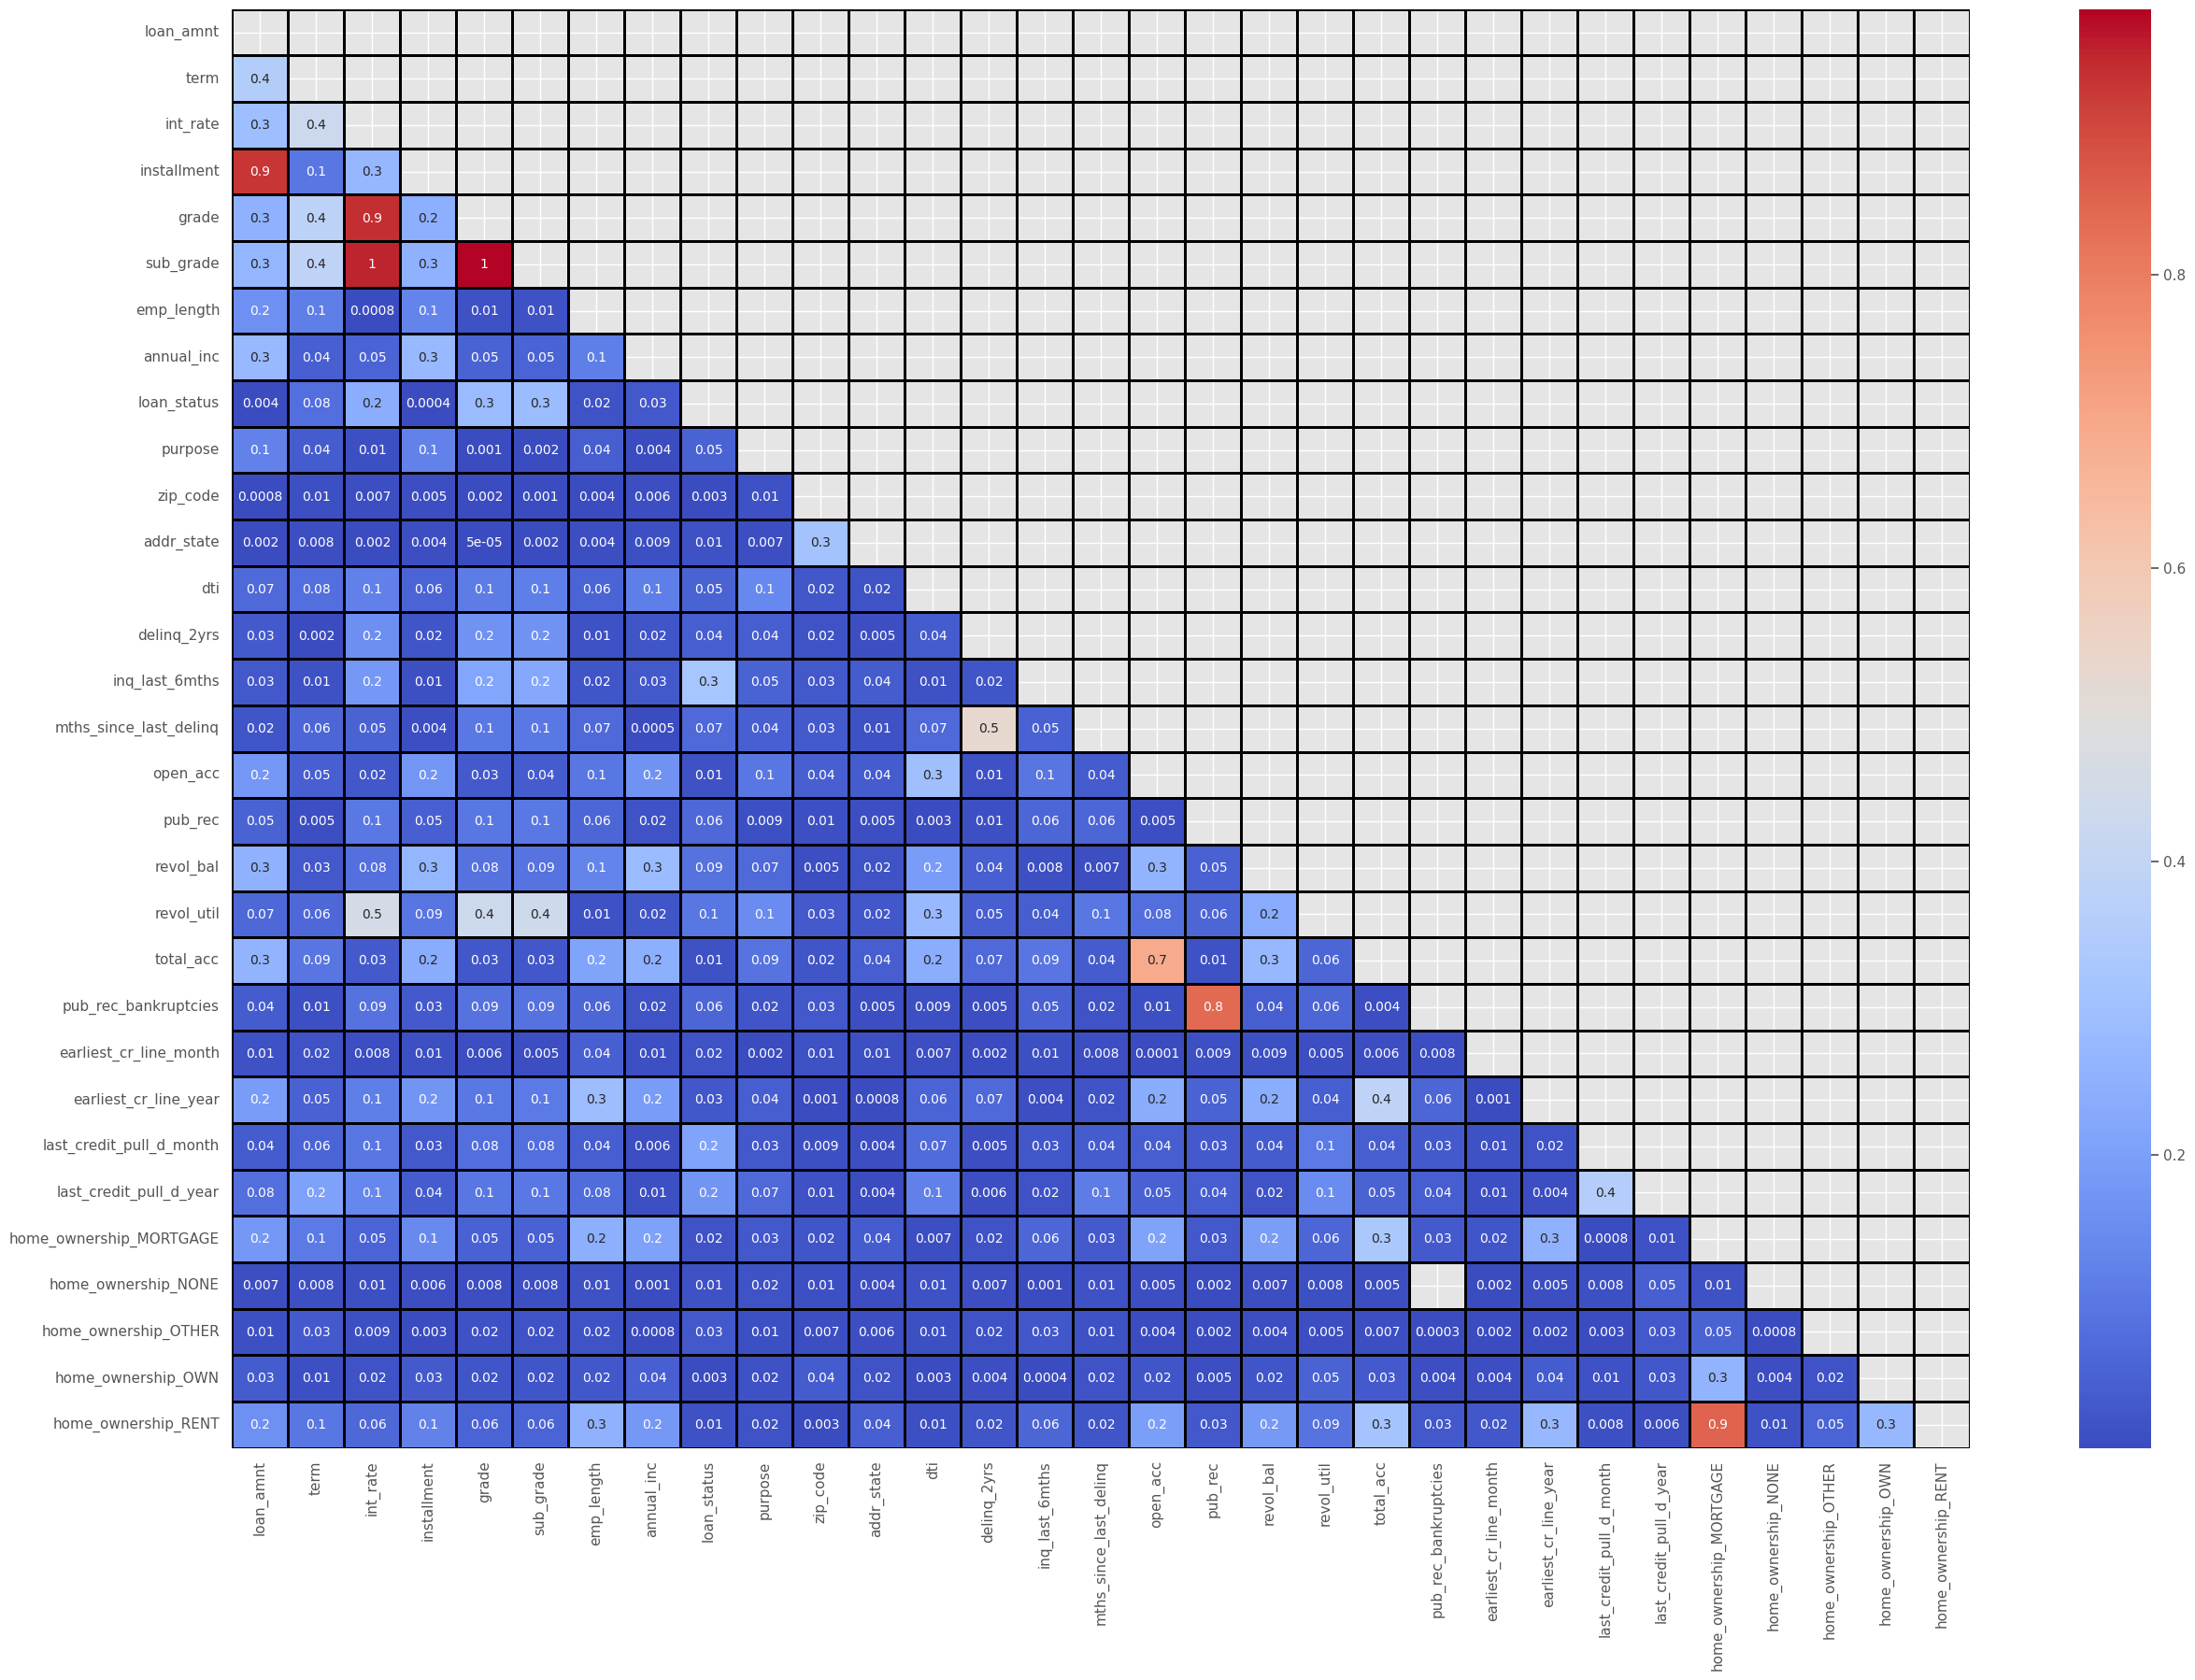

In [ ]:
plt.figure(figsize=(30,20))
cor=loan_df.corr().abs()
mask = np.triu(np.ones_like(cor, dtype=bool))
sns.heatmap(cor,mask=mask, annot=True, cmap='coolwarm',fmt='.1g' ,linewidths=2, linecolor='black')

**Handling Missing value**

In [ ]:
loan_df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'annual_inc', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'pub_rec_bankruptcies',
       'earliest_cr_line_month', 'earliest_cr_line_year',
       'last_credit_pull_d_month', 'last_credit_pull_d_year',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT'],
      dtype='object')

In [ ]:
miss_values=missing_values(loan_df)
miss_values.head()

Dataframe has 31 columns.
There are 10 columns that have missing values.


Missing Values  % of Total Values
mths_since_last_delinq           26917               63.3
pub_rec_bankruptcies              1365                3.2
emp_length                        1110                2.6
revol_util                          90                0.2
delinq_2yrs                         29                0.1

In [ ]:
null_valued_cols=loan_df.isna().sum()[loan_df.isna().sum()!=0].index.to_list()

In [ ]:
cat_null=[i for i in null_valued_cols if i in categorical_ls]
cat_null

['emp_length', 'revol_util']

<Axes: >

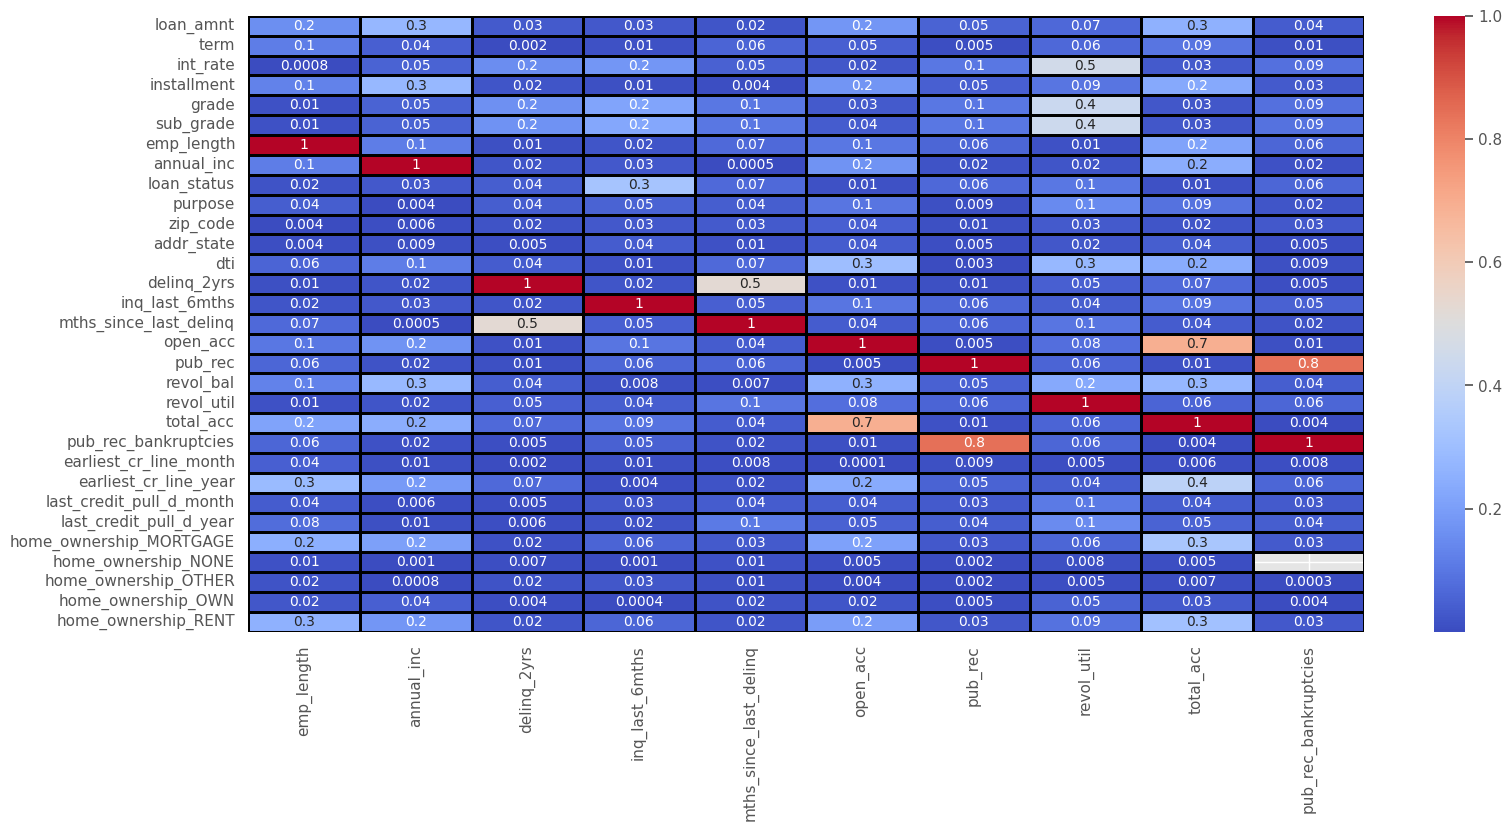

In [ ]:
plt.figure(figsize=(18,8))
cor=loan_df.corr()[null_valued_cols].abs()

sns.heatmap(cor,annot=True, cmap='coolwarm',fmt='.1g' ,linewidths=2, linecolor='black',)

**Applying Knn imputer to handle the missing value.**

In [ ]:
X=loan_df.values

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3, weights='uniform', metric='nan_euclidean')

In [ ]:
X=loan_df.values
imputer.fit(X)

KNNImputer(n_neighbors=3)

In [ ]:
Xtrans = imputer.transform(X)

In [ ]:
Xtrans.shape

(42516, 31)

In [ ]:
loan_df=pd.DataFrame(Xtrans,columns=loan_df.columns.to_list())

In [ ]:
loan_df=pd.DataFrame(Xtrans,columns=loan_df.columns.to_list())
X=loan_df.drop(columns=['loan_status']).values
y=loan_df.loan_status

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)

In [ ]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [ ]:
principalDf['loan_status']=y

In [ ]:
# 3d scatterplot using plotly
import plotly.express as px
fig = px.scatter_3d(principalDf, x='principal component 1', y='principal component 2', z='principal component 3',
              color='loan_status',size_max=10, opacity=0.7)
# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

fig.show()
# model.labels_ is nothing but the predicted clusters i.e y_clusters

For Categorical Variabeles Just Taking The Round Value

In [ ]:
loan_df[cat_null]=loan_df[cat_null].round()

**Data PreProcessing**

In [ ]:
X=loan_df.drop(columns=['loan_status'])
y=loan_df.loan_status

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=1)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31887, 30), (10629, 30), (31887,), (10629,))

**Making The Base Line Model**

---



**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,accuracy_score,precision_score

def Model_performance(model,X_train,X_test, y_train,y_test):
        #Train
        model.fit(X_train,y_train)
        train_class_preds =model.predict(X_train)
        print()
        train_accuracy=model.score(X_train,y_train)
        precision_train=metrics.precision_score(y_train,train_class_preds)
        recall_train=metrics.recall_score(y_train,train_class_preds)
        f1_train=metrics.f1_score(y_train,train_class_preds)
        fp_train, tp_train, th_train = metrics.roc_curve(y_train,train_class_preds)
        auc_train=metrics.auc(fp_train, tp_train)
        classification_report_train=classification_report(y_train,train_class_preds)
        cm_train = confusion_matrix(y_train, train_class_preds)

        #Test
        test_class_preds = model.predict(X_test)
        test_accuracy=model.score(X_test,y_test)
        precision_test=metrics.precision_score(y_test,test_class_preds)
        recall_test=metrics.recall_score(y_test,test_class_preds)
        f1_test=metrics.f1_score(y_test,test_class_preds)
        fp, tp, th = metrics.roc_curve(y_test, test_class_preds)
        auc_test=metrics.auc(fp, tp)
        classification_report_test=classification_report(y_test,test_class_preds)
        cm_test = confusion_matrix(y_test,test_class_preds)
        evaluation={'test_accuracy':test_accuracy,'recall_test':recall_test,'precision_test':precision_test,
                     'f1_test':f1_test,'auc_test':auc_test,"cm_test":cm_test,'train_accuracy':train_accuracy,
                     'precision_train':precision_train,'recall_train':recall_train,'f1_train':f1_train,
                    'auc_train':auc_train,'cm_train':cm_train}
        return evaluation

In [ ]:
logistic_met=Model_performance(lr,X_train,X_test, y_train,y_test)
print(logistic_met)


{'test_accuracy': 0.8022391570232383, 'recall_test': 0.006152389966871746, 'precision_test': 0.8666666666666667, 'f1_test': 0.012218045112781954, 'auc_test': 0.5029587689618294, 'cm_test': array([[8514,    2],
       [2100,   13]]), 'train_accuracy': 0.8036817511838681, 'precision_train': 0.9027777777777778, 'recall_train': 0.0102880658436214, 'f1_train': 0.020344287949921755, 'auc_train': 0.505007148413226, 'cm_train': array([[25562,     7],
       [ 6253,    65]])}


In [ ]:
Eval_df=pd.DataFrame.from_dict(logistic_met, orient='index',columns=['Logistic Regression'])
Eval_df

Logistic Regression
test_accuracy                    0.802239
recall_test                      0.006152
precision_test                   0.866667
f1_test                          0.012218
auc_test                         0.502959
cm_test           [[8514, 2], [2100, 13]]
train_accuracy                   0.803682
precision_train                  0.902778
recall_train                     0.010288
f1_train                         0.020344
auc_train                        0.505007
cm_train         [[25562, 7], [6253, 65]]

<Axes: >

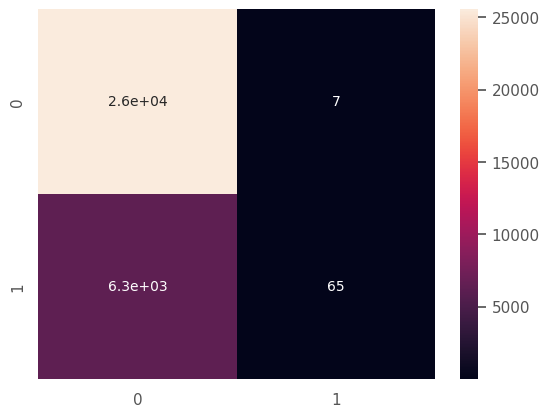

In [ ]:
sns.heatmap(Eval_df['Logistic Regression']['cm_train'],annot=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [ ]:
std=StandardScaler()
X_train=std.fit_transform(X_train)
X_test=std.fit_transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# we can add class_weight='balanced' to add penalize mistake
svc_model = SVC(class_weight='balanced', probability=True)

In [ ]:
Svm_eval=Model_performance(svc_model,X_train,X_test, y_train,y_test)

In [ ]:
sv_df=pd.DataFrame.from_dict(Svm_eval, orient='index',columns=['SVMs'])
sv_df

SVMs
test_accuracy                        0.765077
recall_test                           0.86796
precision_test                       0.452616
f1_test                              0.594972
auc_test                             0.803755
cm_test           [[6298, 2218], [279, 1834]]
train_accuracy                       0.786151
precision_train                      0.479148
recall_train                         0.911048
f1_train                             0.628007
auc_train                            0.833169
cm_train         [[19312, 6257], [562, 5756]]